<img style="float: center;" src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
## ARIMA Time Series

# About the dataset

In late 2010, Onion prices shot through the roof and causing grave crisis. Apparently the crisis was caused by lack of rainfall in major onion producing region - Maharashtra and Karnataka and led to large scale hoarding by the traders. The crisis caused political tension in the country and described as "a grave concern" by then Prime Minister Manmohan Singh.


- BBC Article in Dec 2010 - [Stink over onion crisis is enough to make you cry](http://www.bbc.co.uk/blogs/thereporters/soutikbiswas/2010/12/indias_onion_crisis.html)
- Hindu OpEd in Dec 2010 - [The political price of onions](http://www.thehindu.com/opinion/editorial/article977100.ece)

![](img/peeling_the_onion_small.png)


The purpose of this assignment is to __predict the price of onion in Bangalore using ARIMA.__

### Preprocessing to get the tidy dataframe

In [1]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [2]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/MonthWiseMarketArrivals_Clean.csv')

In [4]:
from datetime import datetime

df['date']  =  pd.to_datetime(df['date'],infer_datetime_format = True)             #convert from string to datetime
print(df.date.min())
# Convert date in datetimedelta figure starting from zero
df["timeIndex"] = df.date - df.date.min()
df  =  df.set_index(['date'])
df.head(5)

1996-01-01 00:00:00


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,timeIndex
date,,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,3288 days
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,3653 days
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,5114 days
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,5479 days
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,5844 days


In [5]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [6]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,timeIndex
date,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,0 days
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,31 days
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,60 days
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,91 days
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,121 days


### Q1. Create a dataframe named dfBang containing only the columns "quantity","priceMod","date" which have city as Bangalore. Also plot the distribution of priceMod with red color.

,quantity,priceMod,timeIndex
date,,,
2004-01-01,227832,991,2922 days
2004-02-01,225133,793,2953 days
2004-03-01,221952,556,2982 days
2004-04-01,185150,465,3013 days
2004-05-01,137390,455,3043 days


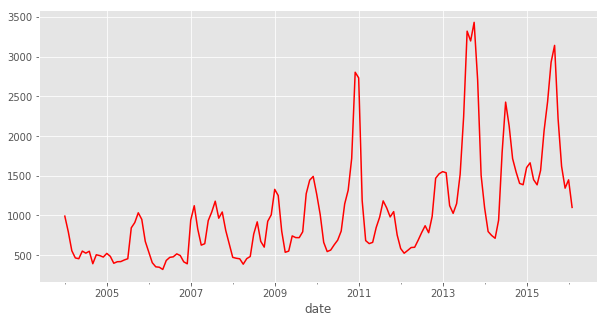

In [7]:
def generate():
    dfBang = df.loc[df.city == "BANGALORE"].copy()
    # Drop redundant columns
    dfBang = dfBang.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)
    dfBang.priceMod.plot(color = 'red')
    return dfBang
dfBang = generate()
dfBang.head()

In [8]:
# Convert to months using the timedelta function
dfBang["timeIndex"] =  dfBang["timeIndex"]/np.timedelta64(1, 'M')

In [9]:
dfBang.timeIndex.head()

date
2004-01-01    96.001971
2004-02-01    97.020473
2004-03-01    97.973264
2004-04-01    98.991766
2004-05-01    99.977412
Name: timeIndex, dtype: float64

In [10]:
# Round the number to 0
dfBang["timeIndex"] = dfBang["timeIndex"].round(0).astype(int)

In [11]:
dfBang.timeIndex.tail()

date
2015-10-01    237
2015-11-01    238
2015-12-01    239
2016-01-01    240
2016-02-01    241
Name: timeIndex, dtype: int32

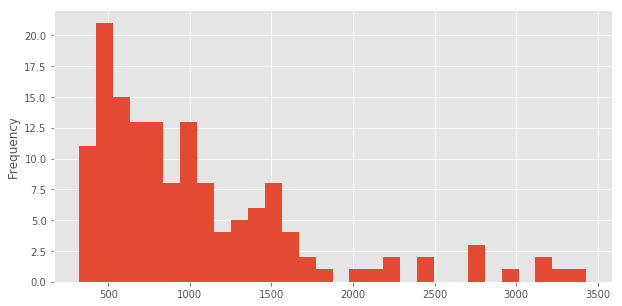

In [12]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

### Q2. Perform seasonal decomposition on priceMod column with model as "additive" , store it in dataframe named decomposed_dataset. Plot it.

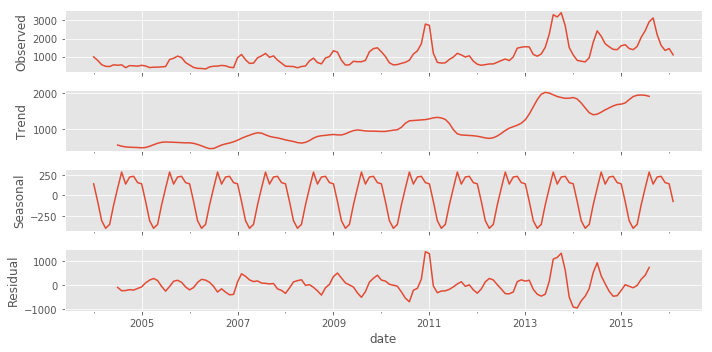

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
def generate():
    decomposed_dataset  =  seasonal_decompose(dfBang.priceMod,model ='additive')
    figure  =  decomposed_dataset.plot()
    plt.show()
    return decomposed_dataset
decomposed_dataset = generate()

### Q3.   Create a function named rolling_means to plot the rolling means statistics (mean and standard deviation both at rolling window size 12) along with the orignal distribution of given time series column. Below are the color and labels specification.
- For orignal distribution of the time series column, take color = 'blue' and label = 'Original'
- For distribution of rolling std. deviation of timeSeries_column_name , take color = 'black' and label = 'Rolling Std'
- For distribution of rolling mean of timeSeries_column_name , take color = 'red' and label = 'Rolling Mean'<br/>
Also, set the title of the plot as 'Rolling Mean & Standard Deviation'.

In [14]:
def rolling_means(timeSeries_column_name):
    rolmean  =  timeSeries_column_name.rolling(window = 12).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  timeSeries_column_name.rolling(window = 12).std()

    #Plot rolling statistics
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize']  =  10, 5 

    timeSeries_column_name.plot( color = 'blue', label = 'Original')
    rolmean.plot(color = 'red', label = 'Rolling Mean')
    std  =  rolstd.plot(color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

### Q4.   Create a function named adf_test to perform the Augmented Dickey-Fuller test on any given timeseries column. Take autolog = 'AIC'. Print out the results of the test, also do their naming(Test Statistic, p-value, Lags Used, Number of Observations Used, Critical Value (1%), Critical Value (5%) and Critical Value(10%) so that you can make clear observation.                     

In [15]:
#Perform Augmented Dickey–Fuller test:
def adf_test(timeSeries_column_name):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(timeSeries_column_name, autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [16]:
def test_stationarity(timeSeries_columnName):
    rolling_means(timeSeries_columnName)
    adf_test(timeSeries_columnName)

### Q5. Check the stationarity of priceMod column of the dfBang dataframe using the test_stationarity function created above.               

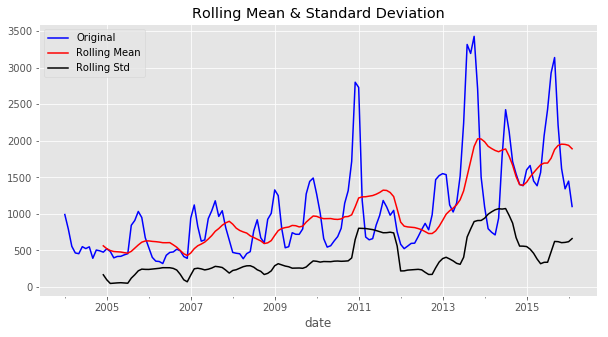

Results of Dickey Fuller Test:
Test Statistic                  -4.004401
p-value                          0.001388
#Lags Used                       2.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [17]:
def generate():
    test_stationarity(dfBang.priceMod)
    return None
generate()

### Q6. Add a column named priceModLog to the dfBang dataframe containing the log transformed values of priceMod column. Also plot the distribution of priceModLog.

,quantity,priceMod,timeIndex,priceModLog
date,,,,
2004-01-01,227832,991,96,6.898715
2004-02-01,225133,793,97,6.675823
2004-03-01,221952,556,98,6.320768
2004-04-01,185150,465,99,6.142037
2004-05-01,137390,455,100,6.120297


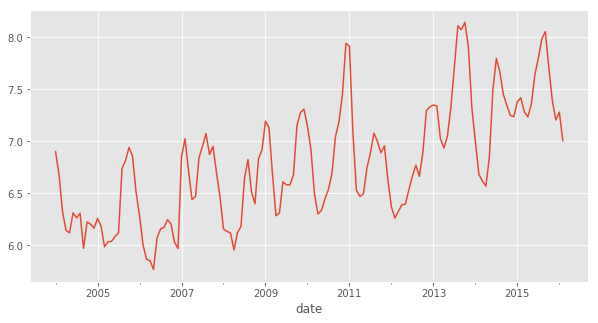

In [18]:
def generate():
    dfBang['priceModLog'] = np.log(dfBang.priceMod)
    dfBang.priceModLog.plot()
    return dfBang
dfBang = generate()
dfBang.head()

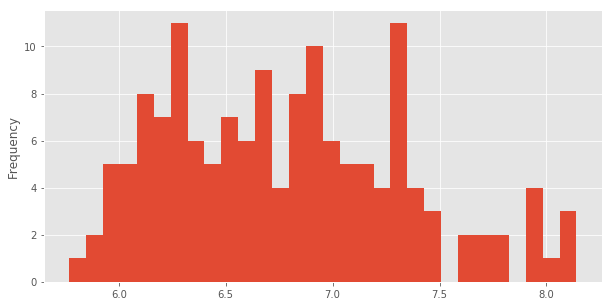

In [19]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

### Q7. Check the stationarity of priceModLog column of the dfBang dataframe using the test_stationarity function created above.               

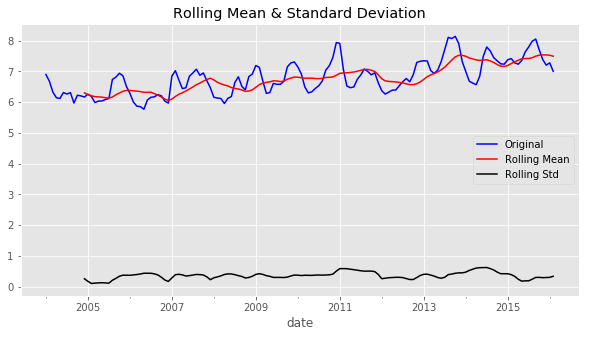

Results of Dickey Fuller Test:
Test Statistic                  -3.650644
p-value                          0.004863
#Lags Used                       2.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [20]:
def generate():
    test_stationarity(dfBang.priceModLog)
    return None
generate()

### Q8. Add a column named priceModLogShift1 to the dfBang dataframe containing the one shifted values of priceModLog column. 
Also, draw scatter plot with priceModLogShift1 on x axis and priceModLog on y axis and 50 as marker size.<br/>
Return the dataframe dfBang after removing null values of priceModLogShift1 column.

,quantity,priceMod,timeIndex,priceModLog,priceModLogShift1
date,,,,,
2004-02-01,225133,793,97,6.675823,6.898715
2004-03-01,221952,556,98,6.320768,6.675823
2004-04-01,185150,465,99,6.142037,6.320768
2004-05-01,137390,455,100,6.120297,6.142037
2004-06-01,311445,551,101,6.311735,6.120297


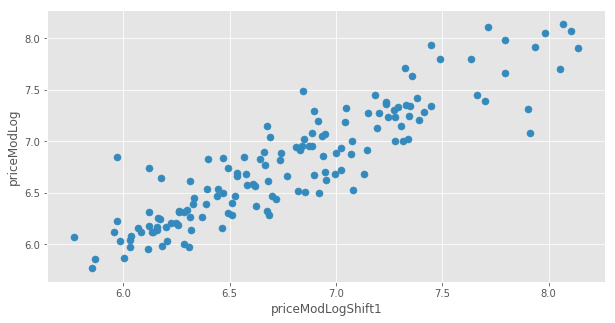

In [21]:
def generate():
    dfBang["priceModLogShift1"] = dfBang.priceModLog.shift()
    dfBang.plot(kind= "scatter", y = "priceModLog", x = "priceModLogShift1", s = 50)
    return dfBang[dfBang.priceModLogShift1.isnull()== False]
dfBang = generate()
dfBang.head()

### Q9. Check the stationarity of priceModLogShift1 column of the dfBang dataframe using the test_stationarity function created above.               

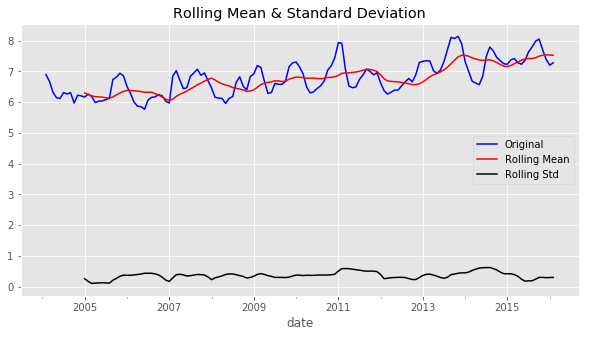

Results of Dickey Fuller Test:
Test Statistic                  -3.500974
p-value                          0.007962
#Lags Used                       2.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [22]:
def generate():
    test_stationarity(dfBang.priceModLogShift1)
    return None
generate()

### Q10.   Add a column named priceModLogDiff to the dfBang dataframe containing the difference of priceModLog and priceModLogShift1 columns. Plot the distribution of priceModLogDiff.

,quantity,priceMod,timeIndex,priceModLog,priceModLogShift1,priceModLogDiff
date,,,,,,
2004-02-01,225133,793,97,6.675823,6.898715,-0.222891
2004-03-01,221952,556,98,6.320768,6.675823,-0.355055
2004-04-01,185150,465,99,6.142037,6.320768,-0.178731
2004-05-01,137390,455,100,6.120297,6.142037,-0.021740
2004-06-01,311445,551,101,6.311735,6.120297,0.191437


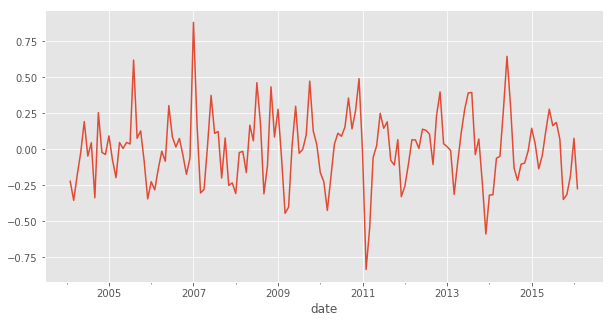

In [23]:
def generate():
    dfBang["priceModLogDiff"] = dfBang.priceModLog - dfBang.priceModLogShift1
    dfBang.priceModLogDiff.plot()
    return dfBang
dfBang = generate()
dfBang.head()

### Q11. Check the stationarity of priceModLogDiff column of the dfBang dataframe using the test_stationarity function created above.               

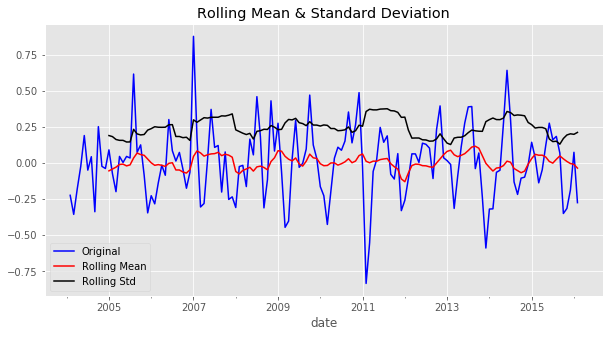

Results of Dickey Fuller Test:
Test Statistic                -7.293246e+00
p-value                        1.399305e-10
#Lags Used                     7.000000e+00
Number of Observations Used    1.370000e+02
Critical Value (1%)           -3.479007e+00
Critical Value (5%)           -2.882878e+00
Critical Value (10%)          -2.578149e+00
dtype: float64


In [24]:
def generate():
    test_stationarity(dfBang.priceModLogDiff)
    return None
generate()

### Q12 a) Create a function named "evaluate_arima_model"  to return the aic values for the ARIMA model trained and fitted with given dataset X and arima_order.

In [25]:
# evaluate an ARIMA model for a given order (p,d,q)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
def evaluate_arima_model(X, arima_order):
    model = ARIMA(X, order=arima_order)
    results_ARIMA = model.fit()
    aic = results_ARIMA.aic
    return aic

### Q12 b) Create a function named "evaluate_models" with dataset, p_values, d_values and q_values as arguments. Making use of the evaluate_arima_model created in previous part of the question, print out AIC and the corresponding order for each combination of p,d,q. Also, print out the values of the order of p,d,q which gives the lowest AIC value along with that minimum AIC value. 
Hint: You'll need to use try and except block to handle Value error. 

In [26]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    print(p,d,q)
                    aic = evaluate_arima_model(dataset, order)
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order,aic))
                except ValueError:
                    best_score, best_cfg = 9999, order
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return None

### Q12 c) Call the function "evaluate_models" created in the above part passing dfBang.priceModLogDiff, p_values, d_values, q_values as arguments, Set the following ranges for p_values, d_values and q_values:
for p_values, [0, 1, 2] <br/>
for d_values, [0,1] <br/>
for q_values, range(0, 2)<br/>

In [27]:
def generate():
    p_values = [0, 1, 2]
    d_values = [0,1]
    q_values = range(0, 2)
    evaluate_models(dfBang.priceModLogDiff, p_values, d_values, q_values)
    return None
generate()

0 0 0
ARIMA(0, 0, 0) AIC=9.724
0 0 1
ARIMA(0, 0, 1) AIC=-17.753
0 1 0
ARIMA(0, 1, 0) AIC=34.696
0 1 1
ARIMA(0, 1, 1) AIC=30.678
1 0 0
ARIMA(1, 0, 0) AIC=-14.085
1 0 1
ARIMA(1, 0, 1) AIC=-16.721
1 1 0
ARIMA(1, 1, 0) AIC=34.026
1 1 1
2 0 0
ARIMA(2, 0, 0) AIC=-19.882
2 0 1
ARIMA(2, 0, 1) AIC=-44.548
2 1 0
ARIMA(2, 1, 0) AIC=28.047
2 1 1
ARIMA(2, 1, 1) AIC=-12.359
Best ARIMA(2, 0, 1) AIC=-44.548


### Running the ARIMA Model 

### Q13. Create and return an ARIMA model trained and fitted with priceModLogDiff and taking order of p,d,q as 2,0,1.  Also, print the number of AR coefficients and the parameters of the model. Also, plot the distribution of fitted values (with black color) and priceModLogDiff (red color).

const                    7.521800e-10
ar.L1.priceModLogDiff    1.492277e-38
ar.L2.priceModLogDiff    9.706955e-13
ma.L1.priceModLogDiff    3.936002e-93
dtype: float64
Lag: 2
Coefficients: const                    0.008824
ar.L1.priceModLogDiff    1.260724
ar.L2.priceModLogDiff   -0.549443
ma.L1.priceModLogDiff   -1.000000
dtype: float64


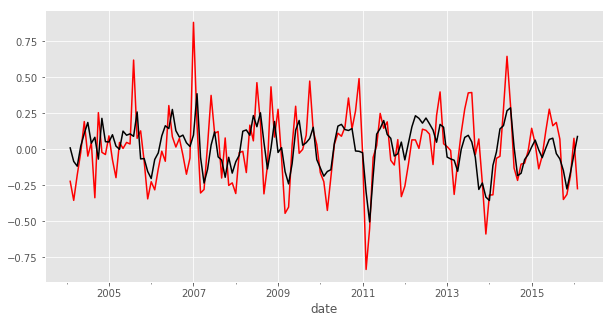

In [28]:
from statsmodels.tsa.arima_model import ARIMA
def generate():
    model = ARIMA(dfBang.priceModLogDiff,order=(2,0,1))
    results_ARIMA = model.fit()
    print(results_ARIMA.pvalues)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    dfBang.priceModLogDiff.plot(color = 'red')
    results_ARIMA.fittedvalues.plot(color = 'black')
    return model, results_ARIMA
model, results_ARIMA = generate()

## Prediction & Reverse transformations of fittedvalues <a name = "prediction"></a>

### Q14. Store the fitted values in a seies named predictions_ARIMA_diff. Return it.

In [29]:
def generate():
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    return predictions_ARIMA_diff
predictions_ARIMA_diff = generate()  
predictions_ARIMA_diff.head()

date
2004-02-01    0.008824
2004-03-01   -0.085040
2004-04-01   -0.118119
2004-05-01    0.021076
2004-06-01    0.109163
dtype: float64

### Q15. Return the cumulative sum of the elements of  predictions_ARIMA_diff. Return it.

In [30]:
def generate():
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    return predictions_ARIMA_diff
predictions_ARIMA_diff_cumsum = generate()  
predictions_ARIMA_diff_cumsum.head()

date
2004-02-01    0.008824
2004-03-01   -0.085040
2004-04-01   -0.118119
2004-05-01    0.021076
2004-06-01    0.109163
dtype: float64

### Q16. Create a series named predictions_ARIMA_log of the same length as that of dfBang and all the elements values equal to the first element of priceModLog also keep the same index as that of dfBang.
To this series add predictions_ARIMA_diff_cumsum. Return the obtained series

In [31]:
def generate():
    predictions_ARIMA_log = pd.Series(dfBang.priceModLog.iloc[0], index=dfBang.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    return predictions_ARIMA_log
predictions_ARIMA_log = generate()
predictions_ARIMA_log.head()

date
2004-02-01    6.684647
2004-03-01    6.590783
2004-04-01    6.557705
2004-05-01    6.696899
2004-06-01    6.784986
dtype: float64

### Q17. Create a series named reverted_back_prediction obtained by calculating the exponential of all elements of predictions_ARIMA_log

In [32]:
def generate():
    reverted_back_prediction = np.exp(predictions_ARIMA_log)
    reverted_back_prediction.head()
    return reverted_back_prediction
reverted_back_prediction= generate()
reverted_back_prediction.head()

date
2004-02-01    800.028105
2004-03-01    728.350874
2004-04-01    704.652444
2004-05-01    809.890744
2004-06-01    884.468007
dtype: float64

### Q18 Plot the distribution of priceMod ( with black color ) and reverted_back_prediction ( with red color )

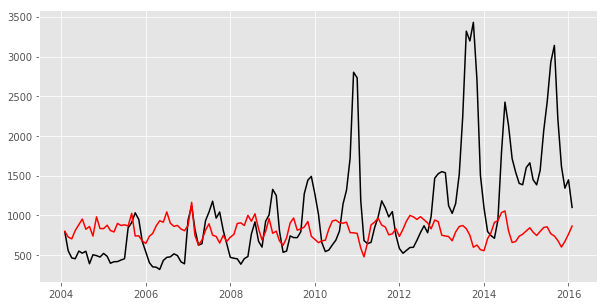

In [33]:
from matplotlib import pyplot
def generate():
    pyplot.plot(dfBang.priceMod,color = 'black')
    pyplot.plot(reverted_back_prediction, color='red')
    pyplot.show()
generate()